# COSE 471 Data Science
## Homework Week2-3

- Week 2 : Data and Visual Attributes / Statistical Graphs
- Week 3 : Data Munging

--------------------------------------

__ Ready to enjoy python for data mining __
-  install [python](https://www.python.org/)

- install libraries (option1, recommended)
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard> assignments__.


- install libraries (option2)
     - install libraries
         - [NumPy](http://docs.scipy.org/doc/numpy-dev/user/index.html), fot arrays
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

# Collect and Clean Data
If you want to analysis data, first you would collect and clean data.

- Choose which domain has the data

> Recognize web page architecture to collect each movie (entity)
>
>> Analysis HTML code hierarchy or structure
>>
>> Extract the useful or necessary data
>>
>>> Formatting, Cleaning, and Sampling data
>>> 
>>> Scaling, Decomposition, Aggregation


In this homwork, we will analysis movie review data in [IMDB](http://www.imdb.com/)
(Click the link to see the data for yourself)

To collect movie data, we will implement the function fetching the detail page of movie review.

Page URL is like below.

| Movie Title | Detail page URL |
|------------------------|----------------------------------|
|The Dark Knight (2008)|http://www.imdb.com/title/tt0468569/|
|Inception (2010)|http://www.imdb.com/title/tt1375666/|
|Interstellar (2014) |http://www.imdb.com/title/tt0816692/|
|Avengers: Age of Ultron (2015)|http://www.imdb.com/title/tt2395427/|
| ..... | .....|

As you can see, The detail pages of movie review have similar pattern. 

--------------------------

### Problem 1

Fill in the code for the __get_movie_detaill_page(movie_id)__, that fetches HTML page about the movie of which id is __movie_id__ ( _tt0468569_ is the movie id of 'The Dark Knight' )

__Hint: __ To send request and get response of HTTP, use the   [requests](http://docs.python-requests.org/en/latest/) Library

In [1]:
import requests

In [2]:
"""
@Function
get_movie_detaill_page

Given a movie_id, return the HTML document.

@Inputs
__
movie_id : str
    The ID of the movie to be fetched

@Returns
___
html : str
    The HTML string for that movie_id
    
@Example
___
>>> get_movie_html('tt0468569')
u'<html xmlns:og="http://ogp.me/ns#" xmlns:fb="http://www.facebook.com/2008/fbml">
....
"""
def get_movie_detaill_page(movie_id):
    print "fetching " , movie_id
        
    # your code here (remove 'pass')
    ur = 'https://www.imdb.com/title/' + (movie_id) + '/'
    r = requests.get(ur)
    final = r.text
    return final



In [3]:
"""
Problem 1 : Test Code
"""

# test_web_page : http://www.imdb.com/title/t2395427 # Avengers: Age of Ultron (2015)
# movie_id : tt2395427
test_movie_id = 'tt2395427'
test_html = get_movie_detaill_page(test_movie_id)

fetching  tt2395427


-----------------------------------------------

### Problem 2

Until now, we have learned that we could collect a descriptive page of the movie by it's 'movie_id'.

However, the HTML format contains a lot of additional data that are not essential nor integral for our purpose.

Therefore, we need to conduct a method called 'first degree data cleaning', which means extracting the data we need
from the HTML we have recently fetched.

In [4]:
from pattern import web

__hint: __

- 'Developer Tool' in Browser shortcut
    - IE: F12
- Chrome/ FireFox: Ctrl+ shift + I, cmd + alt + I

![title](https://github.com/MinhwanYu/cose471_2016/blob/master/img/Problem2-ie.png?raw=true)


![title](https://github.com/MinhwanYu/cose471_2016/blob/master/img/Problem2-chrome.png?raw=true)

The movie title of [above web page](http://imdb.com/title/tt1289401/) is in
> ....
>> `<div class="title_wrapper">`
>>> `<h1 itemprop="name" class="">`

You can find and extract the node of 'the movie title' by using css selector query : __.title_wrapper h1[itemprop=name]__

Below is the example of css selector query.

|CSS Selector	| Description|
|------------------------------|------------------------|
|element('*')	|all nested elements|
|element('*#x')	|all nested elements with id="x"|
|element('div#x')	|all nested <div> elements with id="x"|
|element('div.x')	|all nested <div> elements with class="x"|
|element('div[class="x"]')|	all nested <div> elements with attribute "class" = "x"|
|element('div:first-child')|	the first child in a <div>|
|element('div a')	|all nested <a>'s inside a nested <div>|
|element('div, a')|	all nested <a>'s and <div> elements|
|element('div + a')	|all nested <a>'s directly preceded by a <div>|
|element('div > a')	|all nested <a>'s directly inside a nested <div>|
|element('div < a')|	all nested <div>'s directly containing an <a>|

_source: http://www.clips.ua.ac.be/pages/pattern-web _

In [5]:

"""
@Function
parsing_detail_page

Given a HTML string, return the useful data.

@Inputs
---
html: str
    The HTML for the movie_id

@Returns
----
object: dict (all value is str, not casting!)
    {
     'duration': 
     'genre': 
     'rating': 
     'rating_count': 
     'review_count': 
     'title': 
     'year': 
     }
"""
def contents_to_one(lists):
    a = []
    for i in lists:
        a.append(i.content)
    return a

def check_none(elements,element):
    if elements:
        return elements[0].content
    else:#some year data is not in title a, but in meta itemprop="datapublished" , content = "2015-05-04" like this.
        k = element('meta[itemprop="datePublished"]')
        if(k):
            datestr = k[0].attr['content']
            return datestr[:-6]
        return None

def parsing_detail_page(html):
    # your code here (remove 'pass')
    element= web.Element(html)
    inform = {
        'duration': check_none(element('time[itemprop="duration"]'),element) ,
        'genre': contents_to_one(element('span[itemprop="genre"]')),
        'rating': check_none(element('span[itemprop="ratingValue"]'),element),
        'rating_count': check_none(element('span[itemprop="ratingCount"]'),element),
        'review_count': check_none(element('span[itemprop="reviewCount"]'),element),
        'title': check_none(element('h1[itemprop="name"]'),element),
        'year': check_none(element('h1[itemprop="name"] a'),element)
    }
    
    return inform


In [6]:
"""
Problem 2 : Test Code
"""
test_parsing = parsing_detail_page(test_html)
test_parsing


{'duration': u'\n                        2h 21min\n                    ',
 'genre': [u'Action', u'Adventure', u'Sci-Fi'],
 'rating': u'7.5',
 'rating_count': u'418,330',
 'review_count': u'1,093 user',
 'title': u'Avengers: Age of Ultron&nbsp;<span id="titleYear">(<a href="/year/2015/?ref_=tt_ov_inf">2015</a>)</span> ',
 'year': u'2015'}

### Problem 3

Value of the data type of extraction results are 'str' (string).
Which type of each value? (e.g. str, float, list, dict, ...)

Erase unnecessary part of the value or change the unit, if necessary.

_Your Answer Here:_

| Key             | Current Valuee                          | Data Type | Expected Value |
|---------------------------|-------------------------------------------------------------------|----------------------|---------------------------------|
| title             |'Avengers: Age of Ultron'           |  str          | 'Avengers: Age of Ultron' |
| year            | '2015'                                    |  int          | 2016 |
| genre          | ['Action', 'Adventure', 'Sci-Fi']    |  str array   | ['Action', 'Adventure', 'Sci-Fi'] |
|duration       | '2h 21min'                               |    int       | 141 |
|rating           |  '7.5'                                      |   float      |  7.5 | 
|rating_count | '401,155'                               |    int        | 401155  | 
|review_count| 'See all 1,077 user reviews'      |   int       | 1077 |

### Problem 4

Write a function to convert the data type in __Problem3__

If necessary, please implement additional functions.

__Hint : __ Implementing _str2minute_, _str2number_ function


In [7]:
"""
@Function
parsing_convert_dt
Given a parsing result, return the casting result

@Inputs
---
data: dict
    parsing result

@Returns
----
data : dict
    casting result
"""
import re

def str2minute(minute):

    if(minute):
        intmap= map(int, re.findall(r'\d+', minute))

        checkh=0
        checkm=0
        for ch in minute:
            if(ch=='h'):
                checkh=1
            if(ch=='m'):
                checkm=1
                break
        if (checkh ==0):
            if(checkm==0):
                return None
            else:
                return intmap[0]
        else:
            if(checkm==0):
                return intmap[0]*60
            else:
                return intmap[0]*60 + intmap[1]
    else:
        return None
def str2integer(count):
    if(count):
        wd =""
        for ch in count:
            if(ch!=','):
                if(ch!= ' '):
                    wd= wd+ch
                else:
                    break
        if (wd==""):
            return None
        else:
            return int(wd)
    else:
        return None
    
def delnbsp(title):
    if(title):
        wd = ""
        pre = ""
        check = 0
        for ch in title:
            if(pre=='&' and ch =='n'):
                wd = wd[:-1]
                break
            else:
                wd = wd+ch
            pre = ch
        if (wd==""):
            return None
        else:
            return wd

def nonefloat(rate):
    if rate:
        return float(rate)
    else:
        return None

def noneint(year):
    if year:
        return int(year)
    else:
        return None

def parsing_convert_dt(data):
    # your code here (remove 'pass')
    parsed_data = {
        'duration': str2minute(data['duration']),
        'rating': nonefloat(data['rating']),
        'year': noneint(data['year']),
        'rating_count' : str2integer(data['rating_count']),
        'review_count' : str2integer(data['review_count']),
        'title' : delnbsp(data['title']),
        'genre' : data['genre']
    }
    return parsed_data

In [8]:
"""
Problem 4 : Test Code
"""
test_data = parsing_convert_dt(test_parsing)
test_data

{'duration': 141,
 'genre': [u'Action', u'Adventure', u'Sci-Fi'],
 'rating': 7.5,
 'rating_count': 418330,
 'review_count': 1093,
 'title': u'Avengers: Age of Ultron',
 'year': 2015}

### Problem 5

If you have succeeded in following all the steps above correctly,

you should now be capable of scrapping a descripted page of any movie you want.

However this implementation is only possible when you have the precise id data of the movie

(In this case, the data we want is contained in 'movie_id').

In order to obtain a larger data, we will need to scrap the movie_id set from the movie list page.

If you look at the list page carefully, you can observe that the movies are sorted in order of its popularity.

|Year | Page | Search URL |
|----------|-------------|--------------------------|
|2016|1 |http://www.imdb.com/search/title?title_type=feature&release_date=2016|
|2016|2 |http://www.imdb.com/search/title?title_type=feature&release_date=2016&start=51|
|2016|3 |http://www.imdb.com/search/title?title_type=feature&release_date=2016&start=101|
|2016|...|...|
|2015|1|http://www.imdb.com/search/title?title_type=feature&release_date=2015|
|2015|2|http://www.imdb.com/search/title?title_type=feature&release_date=2015&start=51|
|2015|...|...|
|2014|1|http://www.imdb.com/search/title?title_type=feature&release_date=2014|
| .... | ....| ... |

Now you need to define a function that extracts a movie id set from the given movie search page.

In [30]:
"""
@Function
parsing_year_page

Given a year, fetch search result page and return the movie ids in that search page

@Inputs
---
year: int
    the year in which you want to search
    
page: int (optional, default=1)
    the page of the search page in that year

@Returns
---
movie_ids: array
"""
def makearray(lists):
    arr=[]
    for k in lists:
        arr.append(k.attr['data-tconst'])
    return arr
# each page has 50 movies sorted by popularity
def get_movie_ids_in_year(year, page=1): # if no parameters are passed, set default as page 1  
    # your code here (remove 'pass')
    url = "http://www.imdb.com/search/title?title_type=feature&release_date=" + `year`
    if (page !=1 ):
        a = 50*(page-1)+1
        url = url+ "&start"+`a`
    r= requests.get(url)
    text = r.text
    element = web.Element(text)
    tables = makearray(element('table.results td.title > span.wlb_wrapper'))
    return tables

In [31]:
"""
Problem 5 : Test Code
"""
get_movie_ids_in_year(2014, 3) 



[u'tt1840309',
 u'tt0816692',
 u'tt2015381',
 u'tt2802144',
 u'tt1843866',
 u'tt1951265',
 u'tt1877832',
 u'tt2267998',
 u'tt2582802',
 u'tt2911666',
 u'tt2713180',
 u'tt1790864',
 u'tt2562232',
 u'tt2177771',
 u'tt2245084',
 u'tt1872181',
 u'tt2084970',
 u'tt2980516',
 u'tt0443465',
 u'tt2179136',
 u'tt2278388',
 u'tt1490017',
 u'tt2872718',
 u'tt1587310',
 u'tt2180411',
 u'tt2582846',
 u'tt3136112',
 u'tt1528100',
 u'tt2109248',
 u'tt2310332',
 u'tt2528814',
 u'tt1631867',
 u'tt1809398',
 u'tt0455944',
 u'tt1291150',
 u'tt3235888',
 u'tt1065073',
 u'tt2004420',
 u'tt1959490',
 u'tt1086772',
 u'tt0435651',
 u'tt2333784',
 u'tt1126590',
 u'tt2720680',
 u'tt1638002',
 u'tt1355630',
 u'tt2397535',
 u'tt1253863',
 u'tt1567437',
 u'tt1972779']

--------------------------------------------------------------------------------------------------
__Caution: Below code block needs a lot of time to finish. Please just download dump data__

Combining the functions you have implemented above, you can scrap the top 150 movies from 2000 to 2015.

In [32]:
years = range(2000, 2001) # 2000 ~ 2015 year
pages = range(1,2) # 1 ~ 3 page

def get_data(years, pages=[1]):
    movie_ids = [movie_id
                 for year in years
                 for page in pages
                 for movie_id in get_movie_ids_in_year(year, page)]
    
    data = { movie_id : parsing_convert_dt(parsing_detail_page(get_movie_detaill_page(movie_id)))
            for movie_id in movie_ids}
    
    return data

In [34]:
data = get_data(years, pages)

fetching  tt0172495
fetching  tt0180093
fetching  tt0144084
fetching  tt0208092
fetching  tt0209144
fetching  tt0120903
fetching  tt0162222
fetching  tt0210945
fetching  tt0163978
fetching  tt0181875
fetching  tt0195685
fetching  tt0190590
fetching  tt0190332
fetching  tt0215129
fetching  tt0209958
fetching  tt0160127
fetching  tt0187393
fetching  tt0212346
fetching  tt0175142
fetching  tt0120917
fetching  tt0241303
fetching  tt0146882
fetching  tt0181151
fetching  tt0181865
fetching  tt0134847
fetching  tt0200550
fetching  tt0217869
fetching  tt0204946
fetching  tt0219699
fetching  tt0242423
fetching  tt0138749
fetching  tt0141926
fetching  tt0207201
fetching  tt0170016
fetching  tt0187078
fetching  tt0120755
fetching  tt0213847
fetching  tt0191397
fetching  tt0171433
fetching  tt0230030
fetching  tt0245712
fetching  tt0249462
fetching  tt0266308
fetching  tt0223897
fetching  tt0195714
fetching  tt0164052
fetching  tt0120630
fetching  tt0177971
fetching  tt0212338
fetching  tt0183505


In [35]:
# save crawling data dump
import json

data_str = json.dumps(data)
f = open('data/imdb_cose471_sample3.json', 'a')
f.write(data_str)
f.close()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1. download [dump data](https://raw.githubusercontent.com/MinhwanYu/cose471_2016/master/data/imdb_cose471_sample_missingdata.json)
 ( top150 movies from 2000 to 2015)

2. execute below code.

In [36]:
import json
# load crawling data dump
f = open('data/imdb_cose471_sample_missingdata.json')
json_str = f.read()
f.close()

data = json.loads(json_str)

__Data describtion __
```python
data = [
     'tt0265087': {
         u'rating': 4.8, 
         u'review_count': 164, 
         u'title': u'Black Knight', 
         u'genre': [u'Adventure', u'Comedy', u'Fantasy'],
         u'rating_count': 29727, 
         u'year': 2001, 
         u'duration': 95},
     'tt1430132' : {
         u'rating': 6.7, 
         u'review_count': 525, 
         u'title': u'The Wolverine', 
         u'genre': [u'Action', u'Adventure', u'Sci-Fi'], 
         u'rating_count': 310689, 
         u'year': 2013, u'duration': None},
     'tt3262990': None,
     ......]
```

# Data Wrangling

### Problem 6
There are missing data in Dump which you download.

Remove the data having missing (e.g. None) value.

In [37]:
"""
data : original data
clean_data : cleaned data which have no None values
"""
# your code here
clean_data = dict([(k,v) for k,v in data.items() if v is not None] )


In [38]:
"""
Problem 6 : Test Code

Expected Result : [] (empty list)
"""
empty_data_movies = [ movie_id 
               for movie_id, movie_data in clean_data.items()
               if movie_data is None]
print empty_data_movies

[]


------------

In [39]:
import pandas as pd

movies = pd.DataFrame(clean_data)
movies.head()

,tt0035423,tt0118589,tt0118694,tt0119004,tt0120630,tt0120667,tt0120679,tt0120681,tt0120737,tt0120755,...,tt4046784,tt4062536,tt4178092,tt4263482,tt4270516,tt4285496,tt4382872,tt4441422,tt4552524,tt4935334
duration,118,104,None,89,84,106,123,122,178,123,...,132,94,108,92,79,125,83,85,94,89
genre,"[Comedy, Fantasy, Romance]","[Drama, Music, Romance]","[Drama, Romance]","[Comedy, Drama]","[Animation, Family, Comedy]","[Action, Adventure, Sci-Fi]","[Biography, Drama, Romance]","[Mystery, Thriller]","[Adventure, Drama, Fantasy]","[Action, Adventure, Thriller]",...,"[Action, Sci-Fi, Thriller]","[Crime, Horror, Thriller]","[Mystery, Thriller]","[Horror, Mystery]","[Comedy, Drama]","[Adventure, Drama, History]","[Action, Thriller]",[Thriller],[Horror],"[Horror, Sci-Fi, Thriller]"
rating,6.4,2.1,8.1,5.9,7,5.7,7.4,6.8,8.8,6.1,...,6.4,7.2,7.1,7.4,6.8,8.2,3.9,4.5,4.7,6
rating_count,62715,19156,71915,3000,135665,259789,59691,121681,1190530,233464,...,116554,1031,64694,10928,5505,2690,3090,442,3152,2296
review_count,313,307,344,16,358,1004,271,539,5038,1421,...,337,8,251,165,43,17,25,9,28,19


### Problem 7

The duration value of some data is 'null' or 'None'

In [40]:
tmp_df = movies.copy().transpose()
tmp_df['duration'].isnull().head()

tt0035423    False
tt0118589    False
tt0118694     True
tt0119004    False
tt0120630    False
Name: duration, dtype: bool

Fill the average duration value of all movies in the missing one.

In [41]:
# your code here

avg = tmp_df['duration'].mean()
tmp_df['duration'][tmp_df['duration'].isnull()]=avg

In [42]:
"""
Problem 7 : Test Code

Expected Result : All results are 'False'
"""
tmp_df['duration'].isnull().head()

tt0035423    False
tt0118589    False
tt0118694    False
tt0119004    False
tt0120630    False
Name: duration, dtype: bool

# Data Explore: Aggregation and Visualization

### Problem 8

Group the data by the standard 'year'.

After using '.describe()', you should see

|        |              |duration | rating | rating_count | review_count | title |
|-----------|-------------------|------------------|--------------|---------------------------|----------------------------|-----------|
|__year__  | | | | | ||
|__2000__| __count__ | 150 | 150.0 | 150 | 150|150|
|| __unique__ | 61 | 47.0 | 150 | 130 |150|
|| __top__ | 90 | 7.3 | 17151| 89 |The Adventures of Rocky &amp; Bullwinkle|
|| __freq__ | 7 | 8.0 | 1 | 3 |1|
|__2001__| __count__ | 150 | 150.0 | 150 | 150|150|
|....|....|....|....|....|....|....|

In [43]:
movies = tmp_df
#your code here
year_group_movies = movies.groupby('year')

In [44]:
"""
Problem 8 : Test Code
"""
year_group_movies.describe()

duration  rating  rating_count  review_count  \
year                                                          
2000 count   150.000000   150.0           150           150   
     unique   62.000000    47.0           150           130   
     top     106.000000     7.3         17151            89   
     freq      7.000000     8.0             1             3   
2001 count   150.000000   150.0           150           150   
     unique   59.000000    43.0           150           137   
     top     106.000000     6.2         37884           204   
     freq      8.000000     9.0             1             3   
2002 count   150.000000   150.0           150           150   
     unique   61.000000    39.0           150           142   
     top     101.000000     6.7        146943            59   
     freq      7.000000     9.0             1             2   
2003 count   150.000000   150.0           150           150   
     unique   66.000000    43.0           150           136   
     top      90.000000     5.8       1166846           370   
     freq      6.000000     9.0             1             3   
2004 count   150.000000   150.0           150           150   
     unique   63.000000    43.0           150           136   
     top     107.152808     5.9        288293           152   
     freq      8.000000     8.0             1             3   
2005 count   150.000000   150.0           150           150   
     unique   60.000000    42.0           150           135   
     top     103.000000     6.5         89343           185   
     freq      7.000000     9.0             1             3   
2006 count   150.000000   150.0           150           150   
     unique   62.000000    38.0           150           133   
     top      93.000000     6.4         75773           188   
     freq      6.000000     9.0             1             3   
2007 count   150.000000   150.0           150           150   
     unique   58.000000    36.0           150           135   
...                 ...     ...           ...           ...   
2008 top     110.000000     6.6        189344            97   
     freq      8.000000    11.0             1             3   
2009 count   150.000000   150.0           150           150   
     unique   59.000000    40.0           150           129   
     top      98.000000     6.6         55551           208   
     freq      7.000000    10.0             1             4   
2010 count   150.000000   150.0           150           150   
     unique   50.000000    39.0           150           133   
     top      97.000000     6.4        136703           308   
     freq      9.000000    15.0             1             3   
2011 count   150.000000   150.0           150           150   
     unique   56.000000    39.0           150           132   
     top     107.152808     7.1        507390            68   
     freq      9.000000    10.0             1             2   
2012 count   150.000000   150.0           150           150   
     unique   65.000000    36.0           150           137   
     top      95.000000     6.5        100725           129   
     freq      9.000000    11.0             1             4   
2013 count   150.000000   150.0           150           150   
     unique   57.000000    34.0           150           136   
     top     104.000000     6.7        156197           231   
     freq      8.000000    11.0             1             3   
2014 count   150.000000   150.0           150           150   
     unique   58.000000    35.0           150           138   
     top      97.000000     6.3          5631           285   
     freq      7.000000    10.0             1             3   
2015 count   147.000000   147.0           147           147   
     unique   57.000000    39.0           147           122   
     top     105.000000     6.4         64765           110   
     freq      6.000000     9.0             1             4   

                                             

### Problem 9

Find the minimum, maximum, average number of reviews by each year.

In [45]:
review_statistics = dict();
# your code here

minv = movies['year'].min()
maxv = movies['year'].max()
movies2 = movies
movies2['review_count'] =movies2['review_count'].astype(int)
countt=year_group_movies['review_count'].count()
maxt= year_group_movies['review_count'].max()
meant = movies2.groupby('year')['review_count'].mean()
mint = year_group_movies['review_count'].min()

for i in range(minv,maxv+1):
    review_statistics[i]={'max': maxt[i], 'mean' : meant[i], 'min' : mint[i]}


review_statistics = pd.DataFrame(review_statistics).transpose()

In [46]:
"""
Problem 9 : Test Code
"""
review_statistics

,max,mean,min
2000,2352,392.613333,8
2001,5038,484.953333,16
2002,3503,456.033333,26
2003,3162,450.220000,9
2004,2799,488.180000,10
2005,3276,503.180000,22
2006,2362,474.580000,41
2007,1895,382.226667,15
2008,4516,358.553333,17
2009,3040,318.280000,11


In [48]:
%matplotlib inline
import matplotlib.pyplot as plt


### Problem 10
Given the x-axis as 'year', plot the max and mean 

> x-aixs : year
>
> y-aixs : real value
>
>> line1 : max (color: red)
>>
>> line2 : mean (color: green)

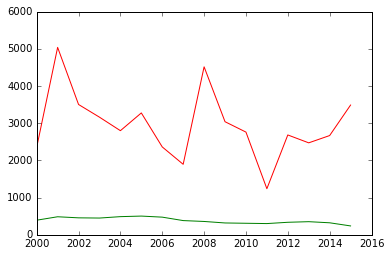

In [49]:
# your code here

plt.plot(review_statistics['max'],color="r")
plt.plot(review_statistics['mean'],color="g")
plt.show()


### Problem 11

Given the x-axis as 'Rating', plot the number of movies (type: histogram).

> x-aixs : rating
>
> y-aixs : the number of movies

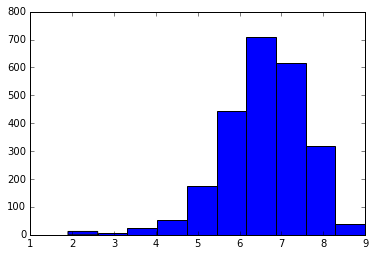

In [50]:
# your code here
plt.hist(movies['rating'])
plt.show()